### Extra fun: Make your own product space sampler!

(Adapted from original tutorial written by Bence Becsy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee
import time

#### Make a quick signal!

Let's take a really simple sinusoidal signal:

$\mathrm{s_{i}} = A \cos(2\pi f t_{i} - \phi)$

A = amplitude

f = frequency

$\phi$ = initial phase

In [2]:
def sineWave(t, A, f, phi):
    return A*np.cos(2*np.pi*f*t - phi)

We're also going to add some noise to our data, such that our data (d) is:

$d = s + n$

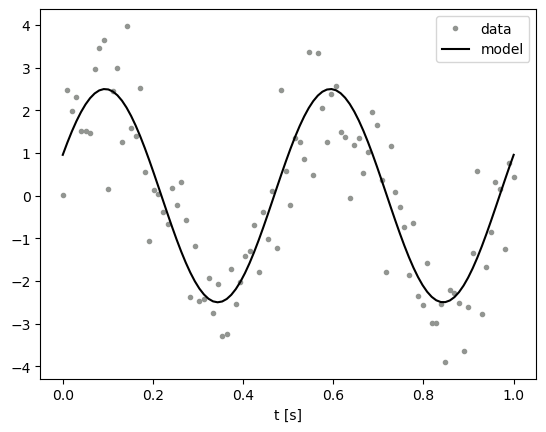

In [3]:
#Set the true parameters of the signal
A0 = 2.5
f0 = 2.0 #Hz
phi0 = 3/8*np.pi

#Set up observation times
t = np.linspace(0,1, 100)

#generate data
d = sineWave(t, A0, f0, phi0) + np.random.normal(0, 1, 100)

#plot data and signal
plt.plot(t, d, color='xkcd:gray', ls='', marker='.', label='data')
plt.plot(t, sineWave(t, A0, f0, phi0), color='xkcd:black', ls='-', label='model')

plt.xlabel("t [s]")

plt.legend()

We need a prior to do Bayesian data analysis, so let's get that in a simple uniform fashion

#### Prior



In [4]:
def get_ln_prior(x):
    #Convert array input into parameters
    A = x[0]
    f = x[1]
    phi = x[2]
    
    #Define lower and upper boundaries of parameters
    A_min = 0.0
    A_max = 5.0
    f_min = 1.0
    f_max = 10.0
    phi_min = 0.0
    phi_max = 2*np.pi
    
    #check if given point is within the prior volume
    if A>A_min and A<A_max and f>f_min and f<f_max and phi>phi_min and phi<phi_max:
        #if yes, return finite prior
        return -np.log(A_max-A_min) -np.log(f_max-f_min) -np.log(phi_max-phi_min)
    else:
        #if not, return minus infinity, which corresponds to prior=0
        return -np.inf

And we're also going to have to make ourselves a likelihood to use which we're going to set up by defining a log-likelihood of the form:

$\ln p(\theta | d) = - \frac{1}{2}(d - s | d - s) = (d | s) - \frac{1}{2}(s | s) - \frac{1}{2}(d | d)$

$(a|b)$ here is the inner product for a stationary white noise defined as:

$(a|b) = \Sigma^{N}_{i=0} \frac{a_{i}b_{i}}{\sigma^{2}}$

Where $N$ is the number of observations and $\sigma^{2}$ is the variance of the noise in the data.

We write this in the code as:

In [5]:
def inner_product(a, b):
    #define fixed variance
    sigma = 1.0
    #return the computed inner product
    return np.sum(a*b)/sigma**2
    
def get_ln_likelihood(x, t, d):
    #get parameters from vector
    A = x[0]
    f = x[1]
    phi = x[2]
    
    #calculate the signal based on the input parameter vector and data
    s = sineWave(t, A, f, phi)
    
    #calculate three different inner products
    ss = inner_product(s,s)
    ds = inner_product(d,s)
    dd = inner_product(d,d)
    
    #return the combination of inner products that give the log likelihood
    return ds - 0.5*ss - 0.5*dd

Now the fun part! Let's set up a basic MCMC product space sampler!

#### MCMC: the key to success

If you want you, can have a go at this first (the completed sampler is in the cell below so no pressure!)

In [6]:
def run_mcmc(Cov, N, t, d):
    """MCMC Routine
    
    Inputs:
    Cov -- Covariance matrix to use for proposal
    N   -- Number of iterations to run for
    t   -- Observation times of data
    d   -- Data
    
    Returns:
    samples      -- Posterior samples in an (N, 3) array
    acc_fraction -- Fraction of steps accepted for each eigendirection in a length 3 array
    log_like     -- Log likelihood values corresponding to the posterior samples in a length 3 array
    """
    
    #Find eigenvectors and eigenvalues of covariance matrix to use for proposal    
    #Form vectors we will jump along by scaling the eigenvectors by the sqrt of the eigenvalues
    ##########################################
    ###############ADD CODE###################
    ##########################################
    #print them
    print(eig1,eig2,eig3)
    
    #initiate arrays to hold posterior samples and log likelihood values
    samples = np.zeros((int(N),3))
    log_like = np.zeros(int(N))
    
    #Define first point to start from and add its likelihood to likelihood array
    #We can start from a predefined point, or
    #from one randomly drawn from the prior (better idea)
    ##########################################
    ###############ADD CODE###################
    ##########################################
    
    #Set up arrays to track acceptance rate (1 element for each parameter)
    #track acceptances in a_yes and rejection in a_no
    a_yes=np.array([0,0,0])
    a_no=np.array([0,0,0])


    #main loop over iterations
    for i in range(int(N-1)):
        #print iteration number 10 times during the run
        if i%int(N/10)==0:    
            print(i)

        #Randomly select which eigendirection to jump in
        ##########################################
        ###############ADD CODE###################
        ##########################################

        #Next proposed point is
        #the current point plus the eigen vector chosen above times a unit normal random number
        ##########################################
        ###############ADD CODE###################
        ##########################################
        
        #Get log likelihood of new point
        ##########################################
        ###############ADD CODE###################
        ##########################################
        
        #Calculate the acceptance probability as the exponentiated
        #difference in log likelihood and difference in log prior
        ##########################################
        ###############ADD CODE###################
        ##########################################

        #Draw random number from (0,1) and compare with acceptance probability
        #to decide if we accept or reject the proposal
        #Add appropriate values to samples and log_like depending on the result
        #Also track accptance with a_yes/a_no
        ##########################################
        ###############ADD CODE###################
        ##########################################

    #Calculate the fraction of accepted steps
    acc_fraction = a_yes/(a_no+a_yes)
    #return the samples, the fraction of accepted steps, and the array of log likelihood values
    return samples, acc_fraction, log_like

In [7]:
#solution
def run_mcmc(Cov, N, t, d):
    """MCMC Routine
    
    Inputs:
    Cov -- Covariance matrix to use for proposal
    N   -- Number of iterations to run for
    t   -- Observation times of data
    d   -- Data
    
    Returns:
    samples      -- Posterior samples in an (N, {number of parameters}) array
    acc_fraction -- Fraction of steps accepted for each eigendirection in a {number of parameters} length array
    log_like     -- Log likelihood values corresponding to the posterior samples
                    in a {number of parameters} length array
    """
    
    #Find eigenvectors and eigenvalues of covariance matrix to use for proposal
    w, v = np.linalg.eig(Cov)
    
    #Form vectors we will jump along by scaling the eigenvectors by the sqrt of the eigenvalues
    eig1 = np.sqrt(w[0])*v[:,0]
    eig2 = np.sqrt(w[1])*v[:,1]
    eig3 = np.sqrt(w[2])*v[:,2]
    print(eig1,eig2,eig3)
    
    #initiate arrays to hold posterior samples and log likelihood values
    samples = np.zeros((int(N),3))
    log_like = np.zeros(int(N))
    
    #Define first point to start from and add its likelihood to likelihood array
    #samples[0,:] = np.array([0.5,5.0,2.0])
    #Draw from prior to set first point
    samples[0,0] = np.random.uniform(0,5)
    samples[0,1] = np.random.uniform(1,10)
    samples[0,2] = np.random.uniform(0,2*np.pi)
        
    log_like[0] = get_ln_likelihood(samples[0,:], t, d)
    
    #Set up arrays to track acceptance rate
    a_yes=np.array([0,0,0])
    a_no=np.array([0,0,0])

    
    #main loop over iterations
    for i in range(int(N-1)):
        #print iteration number 10 times during the run
        if i%int(N/10)==0:    
            print(i)

        #Randomly select which eigendirection to jump in
        jump_select = np.random.choice(3)
        if jump_select==0:
            jump=eig1
        elif jump_select==1:
            jump=eig2
        elif jump_select==2:
            jump=eig3

        #Next proposed point is the current point plus the jump defined above times a unit normal random number
        new_point = samples[i,:] + jump*np.random.normal()
        #Get log likelihood of new point
        log_L = get_ln_likelihood(new_point, t, d)
        
        #Calculate the acceptance probability as the exponentiated
        #difference in log likelihood and difference in log prior
        acc_ratio = np.exp(log_L- log_like[i] + get_ln_prior(new_point) - get_ln_prior(samples[i,:]) )

        #Draw random number to decide if we accept or reject the proposal
        if np.random.uniform()<=acc_ratio: #accept 
            #copy new point to the necxt slice of samples
            samples[i+1,:] = np.copy(new_point)
            #save new likelihood value
            log_like[i+1] = log_L
            #record an acceptance
            a_yes[jump_select]+=1
        else: #reject
            #copy previous sample to new slice
            samples[i+1,:] = np.copy(samples[i,:])
            #copy old likelihood
            log_like[i+1] = log_like[i]
            #record rejection
            a_no[jump_select]+=1

    #Calculate the fraction of accepted steps
    acc_fraction = a_yes/(a_no+a_yes)
    #return the samples, the fraction of accepted steps, and the array of log likelihood values
    return samples, acc_fraction, log_like


Let's see how it goes!

In [15]:
#Define the covaraince matrix for the proposal jumps
Cov = np.array([[0.1, 0., 0.],[0., 0.01, 0.],[0., 0., 0.1]])

#run sampler (might take a minute)
samples, acc_fraction, log_like = run_mcmc(Cov, 1e6, t, d)

[0.31622777 0.         0.        ] [0.  0.1 0. ] [0.         0.         0.31622777]
0
100000
200000
300000
400000
500000
600000
700000
800000
900000


#### Let's check how that all went!

In [16]:
#Print the fraction of accepted steps
#should be around 0.2-0.3, but definitely >0.1 and <0.9
print(acc_fraction)

[0.46223996 0.22521449 0.26128753]


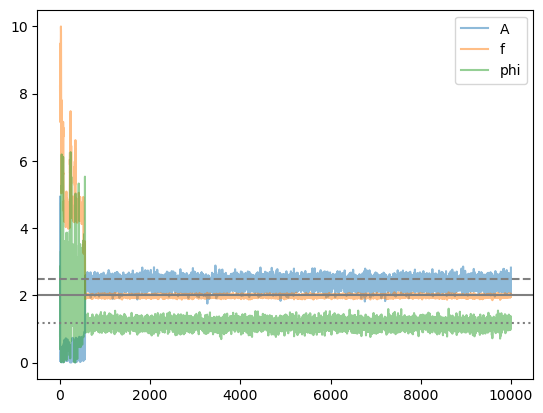

In [17]:
#Make "trace plots", i.e. plot the parameters as a function of iterations
#We want to see "fuzzy caterpillars", i.e. chains randomly moving around a mean value with no longterm structure
#Usually sampler takes some time to find a stationary solution
#The samples before this happens are called "burn-in" an we typically cut them before analyzing the samples
#We can also plot truth values of the parameters to see if the samples converge to that
labels = ["A", "f", "phi"]
for i,lab in enumerate(labels):
    plt.plot(samples[::100,i], label=lab, alpha=0.5)

plt.gca().axhline(2.5, ls='--', color='grey')
plt.gca().axhline(2, ls='-', color='grey')
plt.gca().axhline(3/8*np.pi, ls=':', color='grey')

plt.legend()

Looks like it's converged which is what we want, but let's also check it out in a corner plot with the injected values overlaid:

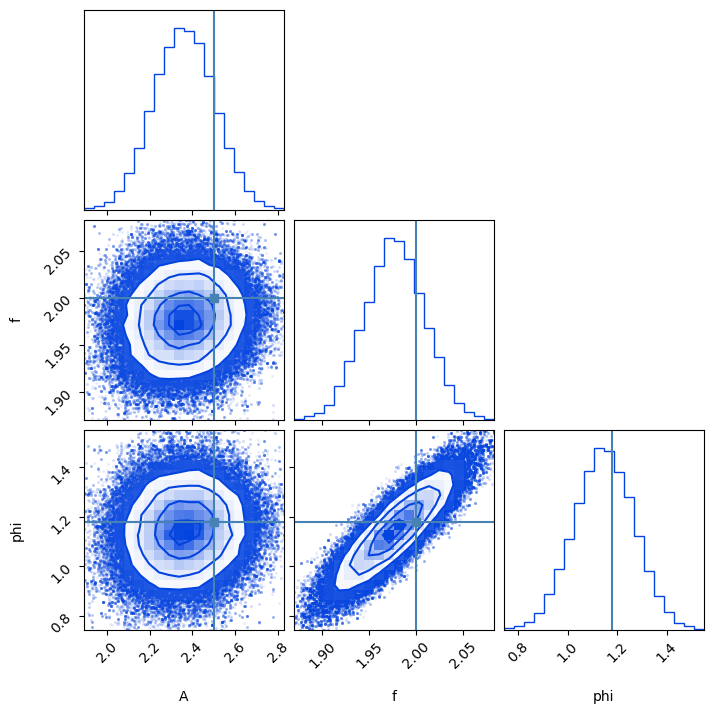

In [19]:
#A very common way of visalizing multi-dimensional posteriors is to make a so-called corner plot
#This shows plots on a {# of parameters}x{# of parameters} grid
#With 1D marginal distributions on the diagonal
#And 2D marginal distributions of each parameter pair on the off-diagonal elements

#Labels to use on the plot
labels = ["A", "f", "phi"]

#Range of the plots for each parameter
#Can be defined as a fraction of points to contain, or as an actiual range between two parameter values
ranges = [0.999,0.999,0.999]
#ranges = [(3.5,6.5),(4.8,5.2),(1.5/8*np.pi,4.5/8*np.pi)]
#ranges = [(0,5),(1,10),(0,2*np.pi)]

#Truth values to overplot
truth = [A0,f0,phi0]

#Number of burnin parameters to discard at the start
burnin = int(0.5*len(samples))

fig = corner.corner(samples[burnin:,:], labels=labels, range=ranges, color='xkcd:blue',
                    truths=truth, hist_kwargs={"density":True})

How does that look?

Hopefully nice and well-sampled!

It's also a very useful practice to make something called a Bayesogram, which is randomised realisation of the signal from the converged chain by taking N number of samples

Let's put that together below:


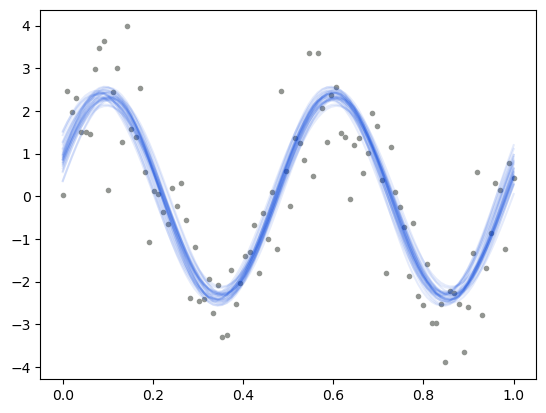

In [20]:
#Plot the data
plt.plot(t, d, color='xkcd:gray', ls='', marker='.', label='data')

#Number of posterior points to use
NN = 30
#Loop over random posterior samples
for i in range(NN):
    #Randomly pick a posterior sample (excluding the burnin)
    idx = np.random.choice(samples.shape[0]-burnin)
    #Plot tha signal model for that posterior sample
    plt.plot(t, sineWave(t, samples[burnin+idx,0], samples[burnin+idx,1], samples[burnin+idx,2]),
             color='xkcd:blue', ls='-', alpha=0.1)

Hopefully that looks good! 

### Congratulations!
You are officially now a data scientist proficient in product space sampling development!

Woo!